# CLUSTERING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# we are using the scipy implementation
%matplotlib inline
from scipy.spatial.distance import cdist, pdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans

In [2]:
from sklearn.preprocessing import normalize
## normalize vectors
def normalize_df(df):
    matrix = df.as_matrix()
    matrix = normalize(matrix)

    return pd.DataFrame(data=matrix, index=df.index)

## Knee-Elbow

In [3]:
def hierarchical (z, n_cluster, df_final):
    
    wss_values = []
    bss_values = []
    k_values = range(1,n_cluster)

    for k in k_values:
        clustering = fcluster(z, k, criterion='maxclust')
        centroids = [np.mean(df_final[clustering==c], axis=0) for c in range(1, k+1)]
        cdist(df_final, centroids, 'euclidean')
        D = cdist(df_final, centroids, 'euclidean')
        cIdx = np.argmin(D, axis=1)
        d = np.min(D, axis=1)

        avgWithinSS = sum(d)/df_final.shape[0]

        # Total with-in sum of square
        wss = sum(d**2)

        tss = sum(pdist(df_final)**2)/df_final.shape[0]

        bss = tss-wss

        wss_values += [wss]
        bss_values += [bss]
        
    fig = plt.figure()
        
    font = {'family' : 'sans', 'size'   : 10}
    plt.rc('font', **font)
    plt.plot(k_values, wss_values, 'bo-', color='red', label='WSS')
    plt.plot(k_values, bss_values, 'bo-', color='blue', label='BSS')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('BSS & WSS')
    plt.xticks(k_values)
    plt.legend()
    plt.title('Hierarchical Clustering');

# Full features

In [4]:
complete_df = pd.read_csv('data/complete_features.csv')

### Single linkage (min)

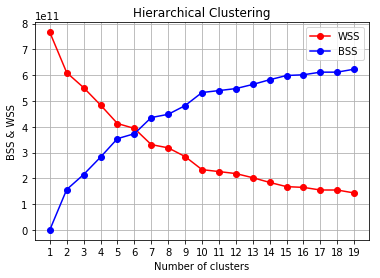

In [5]:
z_tot = linkage(complete_df, 'single', 'euclidean')
hierarchical(z_tot, 15, complete_df)

### Average linkage

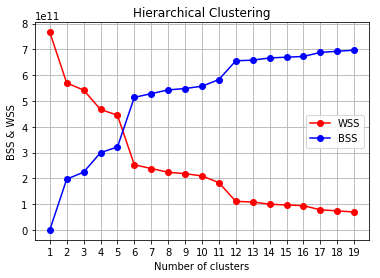

In [6]:
z_tot = linkage(complete_df, 'average', 'euclidean')
hierarchical(z_tot, 20, complete_df)

### Complete linkage (max)

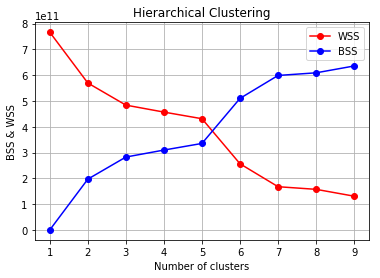

In [7]:
z_tot = linkage(complete_df, 'complete', 'euclidean')
hierarchical(z_tot, 10, complete_df)

# Full features (normalized)

In [8]:
complete_df = normalize_df(complete_df)

### Single linkage (min)

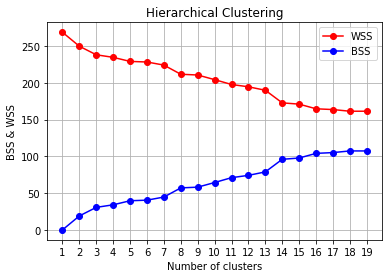

In [9]:
z_tot = linkage(complete_df, 'single', 'euclidean')
hierarchical(z_tot, 20, complete_df)

### Average linkage

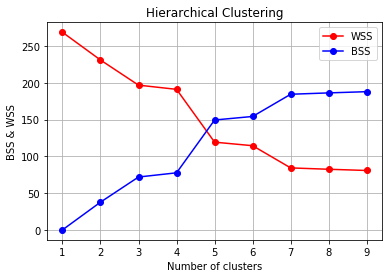

In [10]:
z_tot = linkage(complete_df, 'average', 'euclidean')
hierarchical(z_tot, 10, complete_df)

### Complete linkage (max)

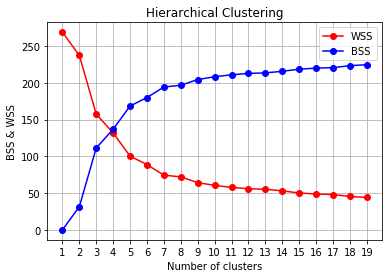

In [11]:
z_tot = linkage(complete_df, 'complete', 'euclidean')
hierarchical(z_tot, 10, complete_df)

# One hot features

In [12]:
df_one_hot = pd.read_csv('data/one-hot_features.csv')

### Single linkage (min)

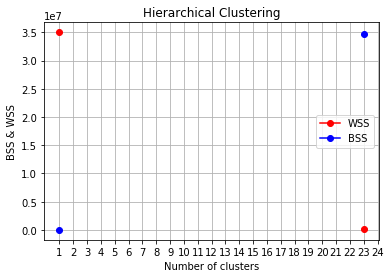

In [13]:
z_one_hot = linkage(df_one_hot, 'single', 'euclidean')
hierarchical (z_one_hot, 25, df_one_hot)

### Average linkage

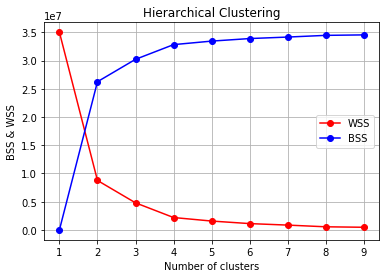

In [14]:
z_one_hot = linkage(df_one_hot, 'average', 'euclidean')
hierarchical (z_one_hot, 10, df_one_hot)

### Complete linkage (max)

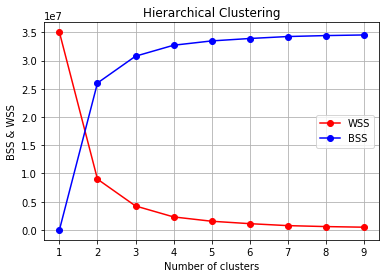

In [15]:
z_one_hot = linkage(df_one_hot, 'complete', 'euclidean')
hierarchical (z_one_hot, 10, df_one_hot)

# One hot features (normalized)

In [16]:
df_one_hot = normalize_df(df_one_hot)

### Single linkage (min)

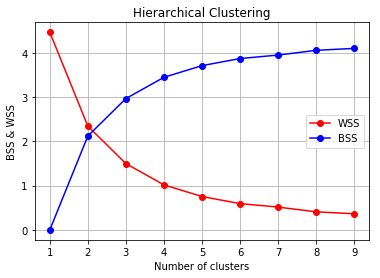

In [17]:
z_one_hot = linkage(df_one_hot, 'single', 'euclidean')
hierarchical (z_one_hot, 10, df_one_hot)

### Average linkage

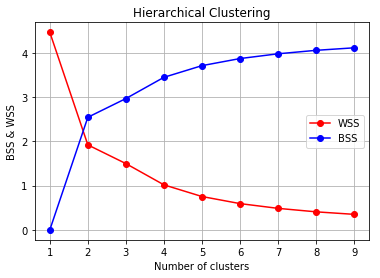

In [18]:
z_one_hot = linkage(df_one_hot, 'average', 'euclidean')
hierarchical (z_one_hot, 10, df_one_hot)

### Complete linkage (max)

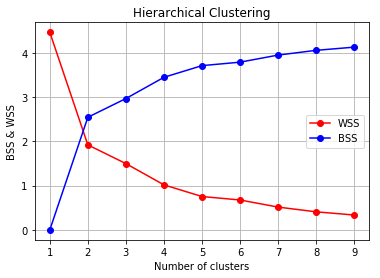

In [19]:
z_one_hot = linkage(df_one_hot, 'complete', 'euclidean')
hierarchical (z_one_hot, 10, df_one_hot)

# TF-IDF

In [20]:
tf_idf_df = pd.read_csv('data/tf_idf_features.csv')

### Single linkage (min)

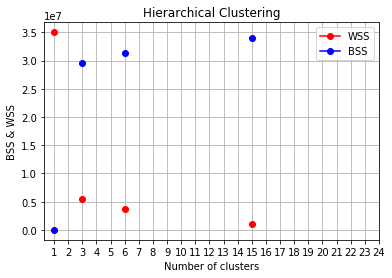

In [21]:
z_tf_idf = linkage(tf_idf_df, 'single', 'euclidean')
hierarchical (z_tf_idf, 25, tf_idf_df)

### Average linkage

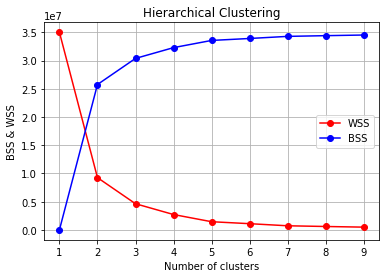

In [22]:
z_tf_idf = linkage(tf_idf_df, 'average', 'euclidean')
hierarchical (z_tf_idf, 10, tf_idf_df)

### Complete linkage (max)

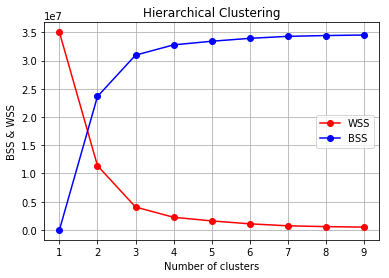

In [23]:
z_tf_idf = linkage(tf_idf_df, 'complete', 'euclidean')
hierarchical (z_tf_idf, 10, tf_idf_df)

# TF-IDF (normalized)

In [24]:
tf_idf_df = normalize_df(tf_idf_df)

### Single linkage (min)

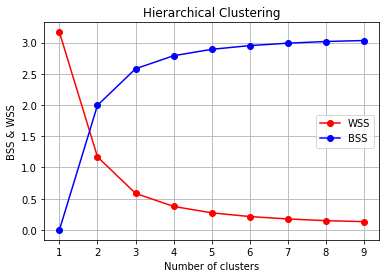

In [25]:
z_tf_idf = linkage(tf_idf_df, 'single', 'euclidean')
hierarchical (z_tf_idf, 10, tf_idf_df)

### Average linkage

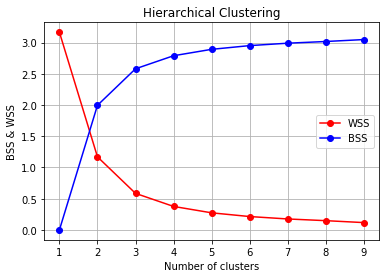

In [26]:
z_tf_idf = linkage(tf_idf_df, 'average', 'euclidean')
hierarchical (z_tf_idf, 10, tf_idf_df)

### Complete linkage (max)

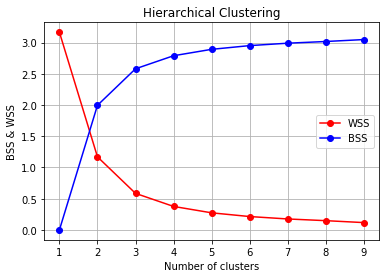

In [27]:
z_tf_idf = linkage(tf_idf_df, 'complete', 'euclidean')
hierarchical (z_tf_idf, 10, tf_idf_df)

# Tweet features

In [28]:
tweets_df = pd.read_csv('data/users_tweet_features.csv')

### Single linkage (min)

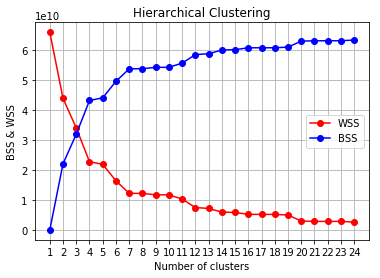

In [29]:
z_tweets = linkage(tweets_df, 'single', 'euclidean')
hierarchical(z_tweets, 25, tweets_df)

### Average linkage

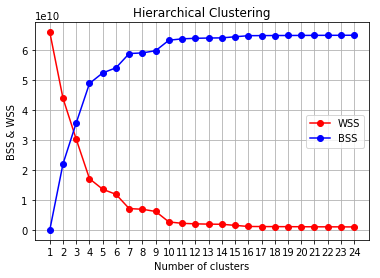

In [30]:
z_tweets = linkage(tweets_df, 'average', 'euclidean')
hierarchical(z_tweets, 25, tweets_df)

### Complete linkage (max)

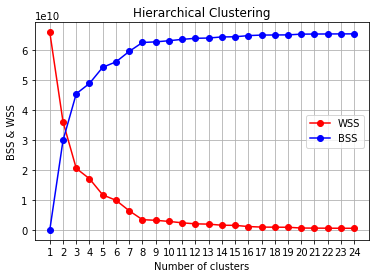

In [31]:
z_tweets = linkage(tweets_df, 'complete', 'euclidean')
hierarchical(z_tweets, 25, tweets_df)

# Tweet features (normalized)

In [32]:
tweets_df = normalize_df(tweets_df)

### Single linkage (min)

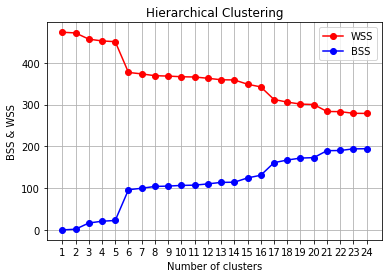

In [33]:
z_tweets = linkage(tweets_df, 'single', 'euclidean')
hierarchical(z_tweets, 25, tweets_df)

### Average linkage

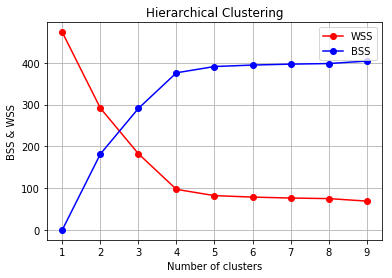

In [34]:
z_tweets = linkage(tweets_df, 'average', 'euclidean')
hierarchical(z_tweets, 10, tweets_df)

### Complete linkage (max)

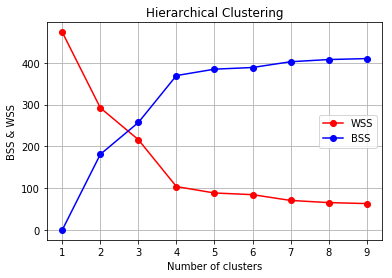

In [35]:
z_tweets = linkage(tweets_df, 'complete', 'euclidean')
hierarchical(z_tweets, 10, tweets_df)

# Profile features

In [36]:
profile_df = pd.read_csv('data/profile_features.csv')

### Single linkage (min)

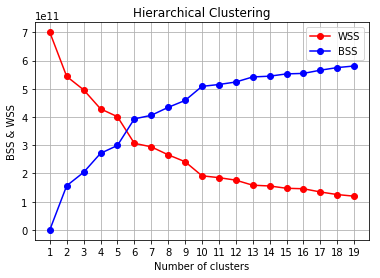

In [37]:
z_profile = linkage(profile_df, 'single', 'euclidean')
hierarchical(z_profile, 20, profile_df)

### Average linkage

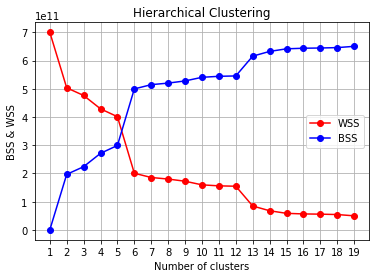

In [38]:
z_profile = linkage(profile_df, 'average', 'euclidean')
hierarchical(z_profile, 20, profile_df)

### Complete linkage (max)

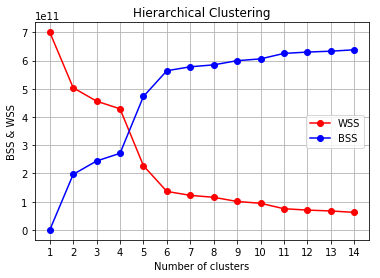

In [39]:
z_profile = linkage(profile_df, 'complete', 'euclidean')
hierarchical(z_profile, 15, profile_df)

# Profile features (normalized)

In [40]:
profile_df = normalize_df(profile_df)

### Single linkage (min)

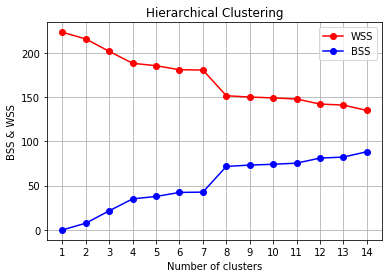

In [41]:
z_profile = linkage(profile_df, 'single', 'euclidean')
hierarchical(z_profile, 15, profile_df)

### Average linkage

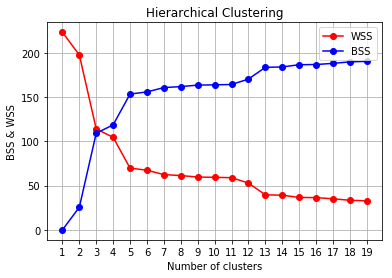

In [42]:
z_profile = linkage(profile_df, 'average', 'euclidean')
hierarchical(z_profile, 20, profile_df)

### Complete linkage (max)

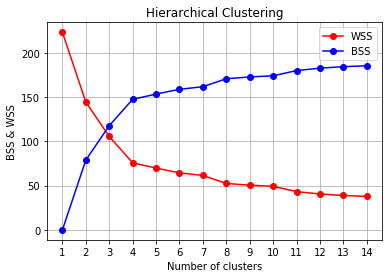

In [43]:
z_profile = linkage(profile_df, 'complete', 'euclidean')
hierarchical(z_profile, 15, profile_df)